# Collection models (SF, MF, & COM)

In [1]:
# Import libraries
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option("display.precision", 2)

In [2]:
# Treatment processes
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}
Treatment_processes['TS'] = {'input_type':ProcessMetaData['TS']['InputType'] , 'model':sppm.TS()}

# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'TS', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=20)
data['Heavy Duty Truck'].loc['LF', 'TS'] = 0.0
data['Heavy Duty Truck'].loc[:, 'Collection'] = [30, 30, 30, 30, 30, 30, 30, None]
distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,TS,Collection
LF,NaN,20.0,20.0,20.0,20.0,20.0,0.0,30.0
Composting,NaN,NaN,20.0,20.0,20.0,20.0,20.0,30.0
AD,NaN,NaN,NaN,20.0,20.0,20.0,20.0,30.0
WTE,NaN,NaN,NaN,NaN,20.0,20.0,20.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,20.0,20.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,20.0,30.0
TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
scheme = ('RWC', 'N/A', 'N/A')
scheme_SF=sppm.SF_Col.scheme()
scheme_SF[scheme] = 1
SF = sppm.SF_Col('Collection', scheme_SF, Treatment_processes=Treatment_processes, Distance=distance)
SF.calc()

scheme_MF=sppm.MF_Col.scheme()
scheme_MF[scheme] = 1
MF = sppm.MF_Col('Collection', scheme_MF, Treatment_processes=Treatment_processes, Distance=distance)
MF.calc()

scheme_COM=sppm.COM_Col.scheme()
scheme_COM[scheme] = 1
COM = sppm.COM_Col('Collection', scheme_COM, Treatment_processes=Treatment_processes, Distance=distance)
COM.calc()

# Compare Input Data

In [4]:
def compare_col(param, scheme):
    scheme_SF=sppm.SF_Col.scheme()
    scheme_SF[scheme] = 1
    SF = sppm.SF_Col('Collection', scheme_SF, Treatment_processes=Treatment_processes, Distance=distance)
    SF.calc()

    scheme_MF=sppm.MF_Col.scheme()
    scheme_MF[scheme] = 1
    MF = sppm.MF_Col('Collection', scheme_MF, Treatment_processes=Treatment_processes, Distance=distance)
    MF.calc()

    scheme_COM=sppm.COM_Col.scheme()
    scheme_COM[scheme] = 1
    COM = sppm.COM_Col('Collection', scheme_COM, Treatment_processes=Treatment_processes, Distance=distance)
    COM.calc()
    
    fig, ax =plt.subplots(1, 1, figsize=(16,4))
    res = pd.concat([SF.col[param], MF.col[param], COM.col[param]], join='outer', axis=1, keys=['SF','MF','COM'])
    res.plot.bar(ax=ax)
    ax.tick_params(rotation=0)
    return res.T

### TL: Loading time at one service stop (min/stop)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,0.19,0.19,0.45,0.45,0.15,0.19,0.19,0.45,NaN,0.45,NaN,NaN,NaN,NaN,NaN
MF,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN
COM,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,NaN,1.00,NaN,NaN,NaN,NaN,1.0


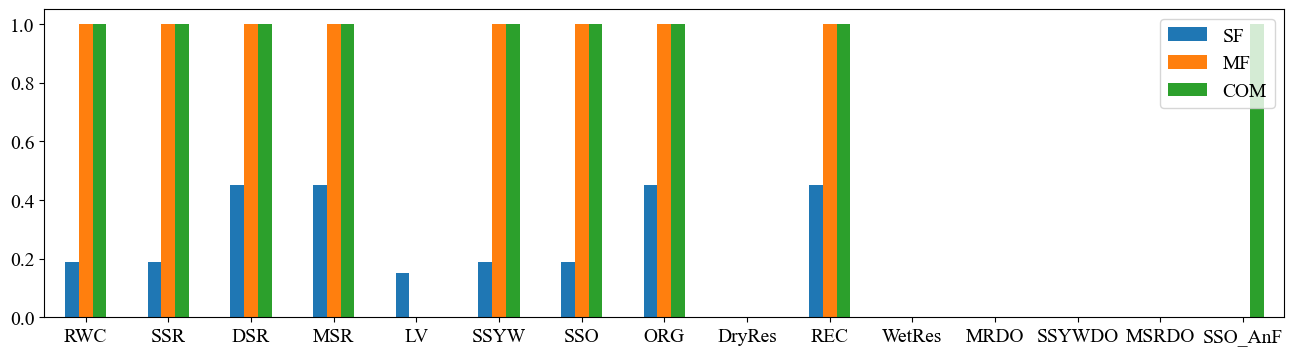

In [5]:
compare_col('TL', ('RWC', 'N/A', 'N/A'))

### S: Time to unload at disposal facility                  (min/trip)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,16.0,16.0,20.0,20.0,16.0,16.0,16.0,32.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN
MF,16.0,16.0,20.0,20.0,NaN,16.0,16.0,32.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN
COM,16.0,16.0,20.0,20.0,NaN,16.0,16.0,32.0,NaN,32.0,NaN,NaN,NaN,NaN,16.0


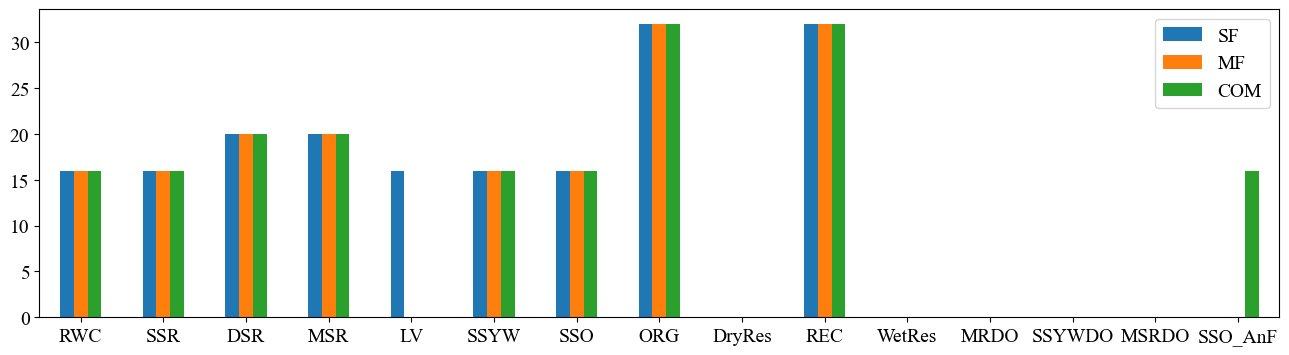

In [6]:
compare_col('S', ('RWC', 'N/A', 'N/A'))

### Tbtw: Travel time between service stops  (min/stop)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,0.2,0.22,0.22,0.22,0.2,0.22,0.22,0.2,0.2,0.2,0.2,0.2,0.22,0.22,NaN
MF,0.2,0.20,0.20,0.20,NaN,0.20,0.20,0.2,0.2,0.2,0.2,NaN,NaN,0.20,NaN
COM,0.2,0.20,0.20,0.20,NaN,0.20,0.20,0.2,0.2,0.2,0.2,NaN,NaN,0.20,0.2


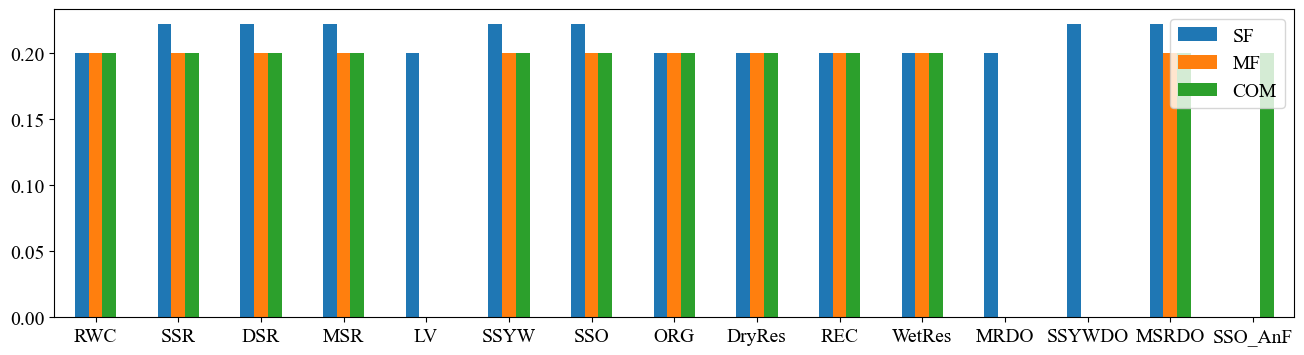

In [7]:
compare_col('Tbtw', ('RWC', 'N/A', 'N/A'))

### Trf: Travel time btwn route and disposal fac.  (min/trip)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,20.34,20.34,21.82,21.82,21.82,20.34,20.34,20.34,21.82,20.34,21.82,20.34,20.34,21.82,NaN
MF,20.34,20.34,21.82,21.82,NaN,20.34,20.34,20.34,21.82,20.34,21.82,NaN,NaN,21.82,NaN
COM,20.34,20.34,21.82,21.82,NaN,20.34,20.34,20.34,21.82,20.34,21.82,NaN,NaN,21.82,21.82


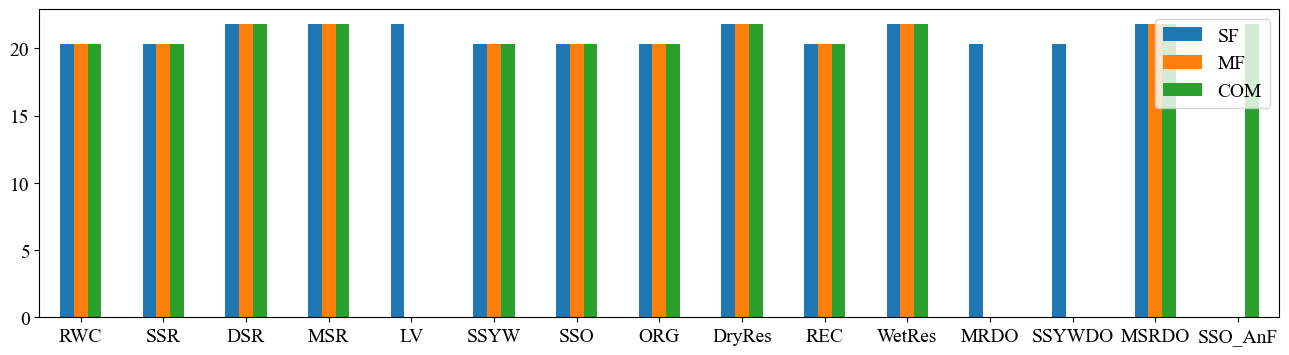

In [8]:
compare_col('Trf', ('RWC', 'N/A', 'N/A'))

### Tgr: Time from grg to 1st collection route             (min/day-vehicle)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,NaN
MF,6.86,6.86,6.86,6.86,NaN,6.86,6.86,6.86,6.86,6.86,6.86,NaN,NaN,6.86,NaN
COM,6.86,6.86,6.86,6.86,NaN,6.86,6.86,6.86,6.86,6.86,6.86,NaN,NaN,6.86,6.86


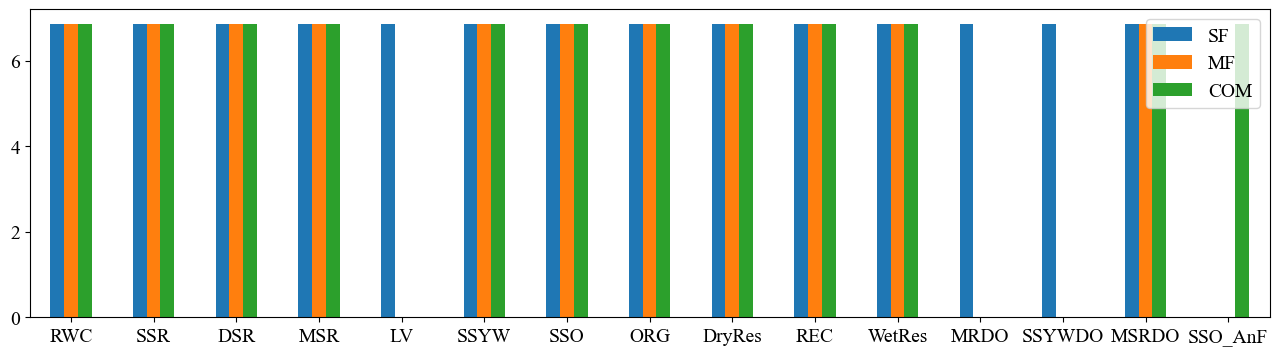

In [9]:
compare_col('Tgr', ('RWC', 'N/A', 'N/A'))

### Tfg: Time from disposal fac. to garage (min/day-vehicle)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,24.7,24.7,26.18,26.18,26.18,24.7,24.7,24.7,26.18,24.7,26.18,24.7,24.7,26.18,NaN
MF,24.7,24.7,26.18,26.18,NaN,24.7,24.7,24.7,26.18,24.7,26.18,NaN,NaN,26.18,NaN
COM,24.7,24.7,26.18,26.18,NaN,24.7,24.7,24.7,26.18,24.7,26.18,NaN,NaN,26.18,26.18


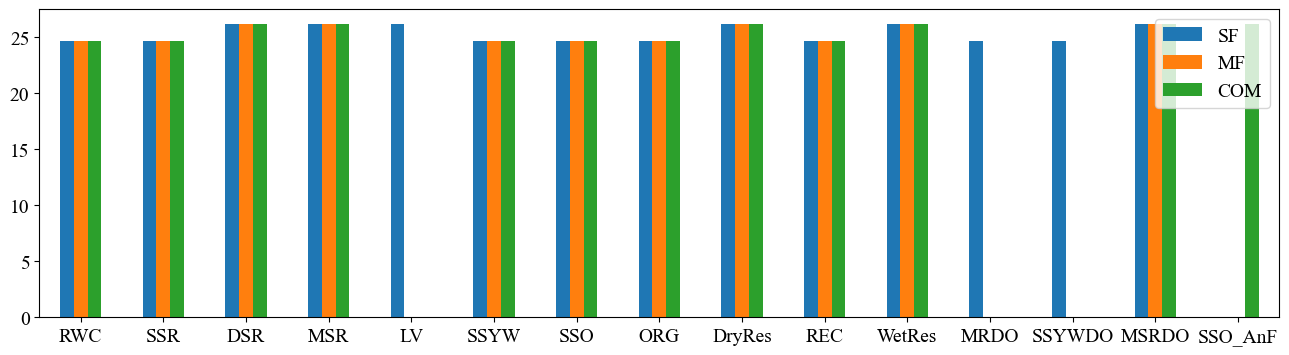

In [10]:
compare_col('Tfg', ('RWC', 'N/A', 'N/A'))

### Nw: Number of additional collectors per vehicle (perrson/vehicle)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO,SSO_AnF
SF,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
MF,0.0,0.0,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
COM,0.0,0.0,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,0.0


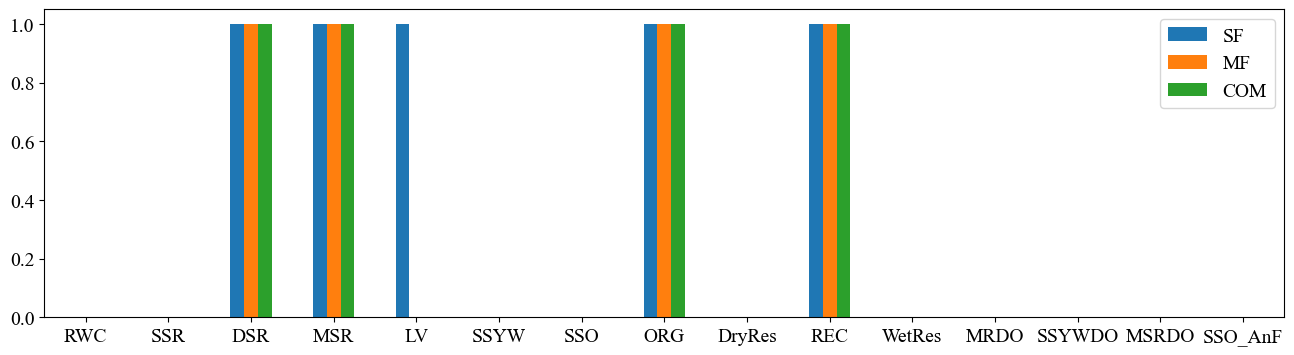

In [11]:
compare_col('Nw', ('RWC', 'N/A', 'N/A'))

,SF,MF,COM
Yard_Trimmings_Leaves,3.73e-02,1.16e-02,1.13e-02
Yard_Trimmings_Grass,9.33e-02,2.90e-02,1.13e-02
Yard_Trimmings_Branches,5.60e-02,1.74e-02,3.40e-03
Food_Waste_Vegetable,1.12e-01,1.16e-01,2.59e-01
Food_Waste_Non_Vegetable,5.58e-02,5.78e-02,1.29e-01
Wood,5.40e-03,4.00e-03,2.00e-03
Wood_Other,5.40e-03,4.00e-03,2.00e-03
Textiles,5.42e-02,5.76e-02,6.80e-03
Rubber_Leather,0.00e+00,0.00e+00,0.00e+00
Newsprint,3.67e-02,5.99e-02,1.47e-02


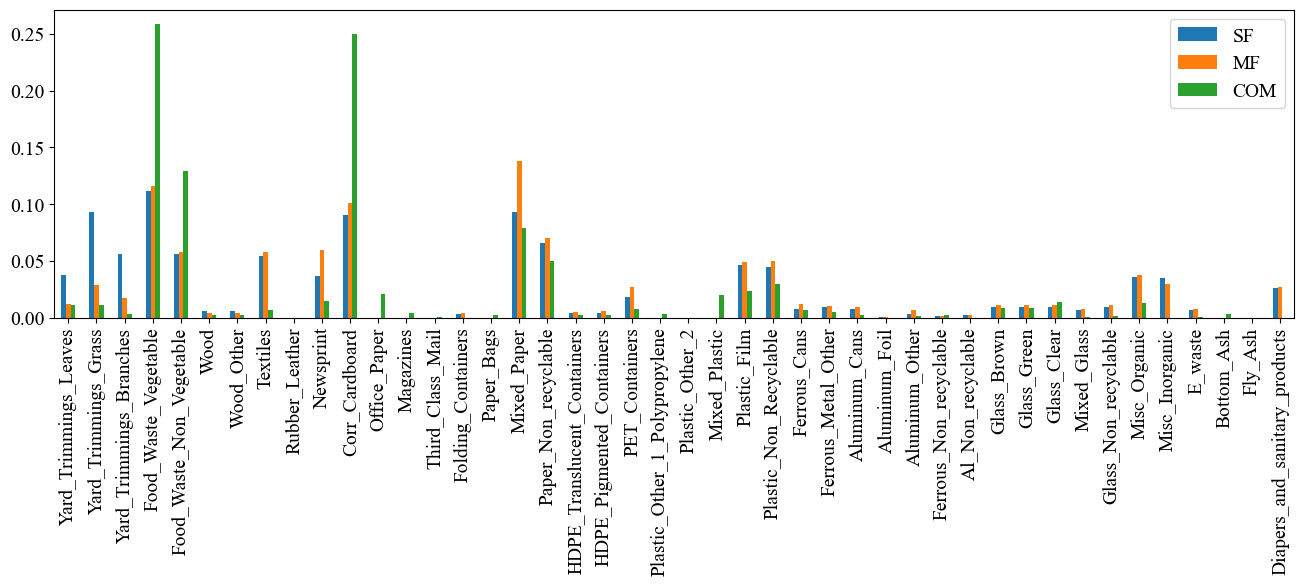

In [12]:
Composition = pd.concat([SF.process_data['Comp'], MF.process_data['Comp'], COM.process_data['Comp']],
                        join='outer',
                        axis=1,
                        keys=['SF','MF','COM'])
fig, ax =plt.subplots(1, 1, figsize=(16,4))
Composition.plot.bar(ax=ax)
Composition

# Comparison of Results

In [13]:
def compare(scheme, Columns):
    scheme_SF=sppm.SF_Col.scheme()
    scheme_SF[scheme] = 1
    SF = sppm.SF_Col('Collection', scheme_SF, Treatment_processes=Treatment_processes, Distance=distance)
    SF.calc()
    
    scheme_MF=sppm.MF_Col.scheme()
    scheme_MF[scheme] = 1
    MF = sppm.MF_Col('Collection', scheme_MF, Treatment_processes=Treatment_processes, Distance=distance)
    MF.calc()
    
    scheme_COM=sppm.COM_Col.scheme()
    scheme_COM[scheme] = 1
    COM = sppm.COM_Col('Collection', scheme_COM, Treatment_processes=Treatment_processes, Distance=distance)
    COM.calc()    
    
    index = ['SF', 'MF', 'COM']
    
    print('trips per day per vehicle (trip/day-vehicle)')
    print(pd.DataFrame((SF.col['RD'], MF.col['RD'], COM.col['RD']), index=index, columns=Columns))
    print('='*40)

    print('Fuel use per Mg of refuse (L/Mg)')
    print(pd.DataFrame((SF.col['FuelMg'], MF.col['FuelMg'], COM.col['FuelMg']), index=index, columns=Columns))
    print('='*40)

    print('Cost per Mg')
    print(pd.DataFrame((SF.col['C_collection'], MF.col['C_collection'], COM.col['C_collection']), index=index, columns=Columns))
    print('='*40)

    print('daily weight of refuse collected per vehicle (tons/vehicle-day)')
    print(pd.DataFrame((SF.col['RefD'], MF.col['RefD'], COM.col['RefD']), index=index, columns=Columns))
    print('='*40)
    
    print('number of collection stops per day (stops/vehicle-day)')
    print(pd.DataFrame((SF.col['SD'], MF.col['SD'], COM.col['SD']), index=index, columns=Columns))
    print('='*40)
    
    print('total number of trucks')
    print(pd.DataFrame((SF.col['Nt'], MF.col['Nt'], COM.col['Nt']), index=index, columns=Columns))
    print('='*40)

## RWC collection

In [14]:
compare(('RWC', 'N/A', 'N/A'), ['RWC'])

trips per day per vehicle (trip/day-vehicle)
      RWC
SF   1.53
MF   5.72
COM  5.83
Fuel use per Mg of refuse (L/Mg)
      RWC
SF   7.22
MF   3.46
COM  3.45
Cost per Mg
       RWC
SF   38.00
MF   9.91 
COM  9.72 
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC
SF   15.55
MF   58.14
COM  59.28
number of collection stops per day (stops/vehicle-day)
        RWC
SF   745.46
MF   45.00 
COM  39.71 
total number of trucks
       RWC
SF   75.65
MF   6.74 
COM  7.56 


## RWC + SSYW collection

In [15]:
compare(('RWC', 'SSYW', 'N/A'), ['RWC', 'SSYW'])

trips per day per vehicle (trip/day-vehicle)
      RWC  SSYW
SF   1.31  0.7 
MF   5.67  2.9 
COM  5.82  1.9 
Fuel use per Mg of refuse (L/Mg)
      RWC   SSYW
SF   8.06  31.64
MF   3.47  10.00
COM  3.45  12.06
Cost per Mg
       RWC    SSYW
SF   44.35  176.42
MF   9.99   41.00 
COM  9.75   62.57 
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC   SSYW
SF   13.33  3.03 
MF   57.66  12.65
COM  59.09  8.29 
number of collection stops per day (stops/vehicle-day)
        RWC    SSYW
SF   777.02  819.59
MF   47.23   177.62
COM  40.58   224.72
total number of trucks
       RWC   SSYW
SF   72.57  68.80
MF   6.42   1.71 
COM  7.39   1.33 


## RWC + SSR collection

In [16]:
compare(('RWC', 'N/A', 'SSR'), ['RWC', 'SSR'])

trips per day per vehicle (trip/day-vehicle)
      RWC   SSR
SF   1.24  0.70
MF   5.38  5.14
COM  5.46  5.44
Fuel use per Mg of refuse (L/Mg)
      RWC    SSR
SF   8.39  24.24
MF   3.52  6.42 
COM  3.50  6.33 
Cost per Mg
       RWC     SSR
SF   46.91  134.94
MF   10.55  17.91 
COM  10.38  16.93 
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC    SSR
SF   12.61  3.96 
MF   54.63  28.95
COM  55.48  30.63
number of collection stops per day (stops/vehicle-day)
        RWC     SSR
SF   787.32  818.56
MF   61.25   72.35 
COM  57.30   58.37 
total number of trucks
       RWC    SSR
SF   71.62  68.89
MF   4.95   4.19 
COM  5.24   5.14 


## RWC + SSYW + SSR collection

In [17]:
compare(('RWC', 'SSYW', 'SSR'), ['RWC', 'SSYW', 'SSR'])

trips per day per vehicle (trip/day-vehicle)
      RWC  SSYW   SSR
SF   1.00  0.7   0.70
MF   5.29  2.9   5.14
COM  5.42  1.9   5.44
Fuel use per Mg of refuse (L/Mg)
      RWC   SSYW    SSR
SF   9.91  31.64  24.24
MF   3.53  10.00  6.42 
COM  3.51  12.06  6.33 
Cost per Mg
       RWC    SSYW     SSR
SF   58.44  176.42  134.94
MF   10.72  41.00   17.91 
COM  10.46  62.57   16.93 
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC   SSYW    SSR
SF   10.13  3.03   3.96 
MF   53.72  12.65  28.95
COM  55.09  8.29   30.63
number of collection stops per day (stops/vehicle-day)
        RWC    SSYW     SSR
SF   822.60  819.59  818.56
MF   65.46   177.62  72.35 
COM  59.14   224.72  58.37 
total number of trucks
       RWC   SSYW    SSR
SF   68.55  68.80  68.89
MF   4.63   1.71   4.19 
COM  5.07   1.33   5.14 


## RWC + SSO + SSR collection

In [18]:
compare(('RWC', 'SSO', 'SSR'), ['RWC', 'SSO', 'SSR'])

trips per day per vehicle (trip/day-vehicle)
      RWC   SSO   SSR
SF   0.85  1.03  0.70
MF   5.08  4.61  5.14
COM  4.57  5.64  5.44
Fuel use per Mg of refuse (L/Mg)
       RWC    SSO    SSR
SF   11.26  23.01  24.24
MF   3.57   8.56   6.42 
COM  3.68   8.11   6.33 
Cost per Mg
       RWC     SSO     SSR
SF   68.68  119.06  134.94
MF   11.16  25.85   17.91 
COM  12.40  21.13   16.93 
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC    SSO    SSR
SF   8.63   4.48   3.96 
MF   51.62  20.06  28.95
COM  46.44  24.54  30.63
number of collection stops per day (stops/vehicle-day)
        RWC     SSO     SSR
SF   844.04  773.92  818.56
MF   75.21   97.54   72.35 
COM  99.17   49.08   58.37 
total number of trucks
       RWC    SSO    SSR
SF   66.81  72.86  68.89
MF   4.03   3.11   4.19 
COM  3.03   6.11   5.14 
